# Attention (Механизм внимания)



**Attention (механизм внимания)** — это ключевая часть многих современных моделей машинного обучения, таких как трансформеры, и используется для определения того, какие части входных данных наиболее важны для предсказания. Внимание позволяет модели сосредоточиться на разных частях входных данных в зависимости от контекста.

**Как вычисляется Attention?**
В основе внимания лежит идея, что каждое входное слово (или элемент данных) влияет на выходное предсказание с различной степенью важности. Эта важность определяется через специальные веса, которые рассчитываются с помощью скалярных произведений между вопросами (query), ключами (key) и значениями (value).

**Шаги вычисления self-attention**
Для одного шага механизма self-attention, когда у нас есть несколько токенов входной последовательности (например, слова), каждый из которых представлен вектором:

1. Получение запросов (Q), ключей (K) и значений (V):

Для каждого токена входной последовательности формируются три вектора: query (запрос), key (ключ) и value (значение). Эти векторы вычисляются через линейные преобразования, где используются обучаемые веса:


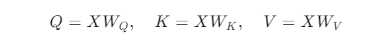\
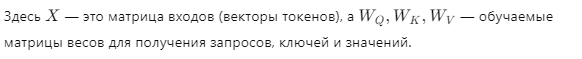

2. Вычисление весов внимания (Attention Weights):

- Для определения важности каждого токена относительно других, вычисляется внимание как скалярное произведение между векторами query и key:

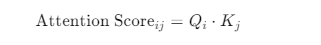

Это даёт оценку того, насколько токен j важен для токена i. Однако такие оценки могут быть слишком большими или малыми, поэтому их необходимо нормализовать.

3. Масштабирование и применение softmax:

- Для масштабирования оценок используют деление на sqrt(dk), где  dk
​
  — размерность ключей. Это нужно для предотвращения слишком больших значений, которые могут быть вредны для градиентных вычислений:

  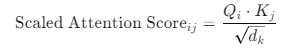

Затем эти значения пропускают через softmax, чтобы получить вероятностное распределение, которое суммируется в 1. Это даёт веса внимания для каждого токена относительно других:
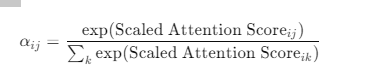

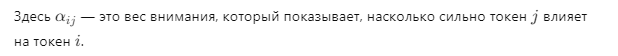

4. Вычисление итогового внимания:

- Итоговое значение внимания для каждого токена получается как взвешенная сумма значений value (V) для всех токенов с учётом весов внимания:
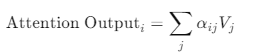

Это и есть выход механизма внимания для токена i, который содержит информацию о том, как все остальные токены влияют на него.

5. Многоголовое внимание (Multi-Head Attention):

Для усиления модели используют механизм многоголового внимания. Это значит, что внимание вычисляется несколько раз с разными весами  (каждая такая пара весов называется "головой"). Результаты всех голов конкатенируются и пропускаются через ещё одну линейную проекцию:

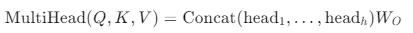

Каждая голова имеет свою собственную интерпретацию входных данных, что позволяет модели учиться на разных аспектах данных одновременно.

In [1]:
import numpy as np
import torch
import torch.nn.functional as F

# Пример входных данных (3 токена, размерность признака 4)
X = torch.Tensor([[1, 0, 1, 0], [0, 2, 0, 2], [1, 1, 1, 1]])

# Размерность признаков
d_k = X.shape[1]

# Инициализация обучаемых матриц весов для Query, Key и Value
W_Q = torch.randn(d_k, d_k)
W_K = torch.randn(d_k, d_k)
W_V = torch.randn(d_k, d_k)

# Получаем Q, K, V
Q = X @ W_Q
K = X @ W_K
V = X @ W_V

# Шаг 2: Вычисляем оценки внимания (attention scores) как скалярное произведение Q и K
attention_scores = Q @ K.T

# Шаг 3: Масштабирование оценок
scaled_attention_scores = attention_scores / np.sqrt(d_k)

# Шаг 4: Применяем softmax для получения весов внимания
attention_weights = F.softmax(scaled_attention_scores, dim=-1)

# Шаг 5: Вычисляем итоговое значение внимания как взвешенную сумму значений V
attention_output = attention_weights @ V

print("Attention Weights:", attention_weights)
print("Attention Output:", attention_output)


OSError: [WinError 126] Не найден указанный модуль. Error loading "C:\Users\Иван\AppData\Roaming\Python\Python311\site-packages\torch\lib\shm.dll" or one of its dependencies.